# Dataset Description
<p>This dataset is a subset of the 1987 National Indonesia Contraceptive Prevalence Survey. The samples are married women who were either not pregnant or do not know if they were at the time of interview. The problem is to predict the current contraceptive method choice<strong>(no use, long-term methods, or short-term methods)</strong> of a woman based on her demographic and socio-economic characteristics.
<a href="https://archive.ics.uci.edu/ml/datasets/Contraceptive+Method+Choice" target="_blank" >cmc</a></p>

#### Inclusion of needed packages and libraries

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix
from scipy.stats import pearsonr
from scipy.stats import shapiro, normaltest, chi2_contingency
ALPHA = 0.05

sns.set()
sns.set_theme()
plt.style.use('classic')
plt.rcParams.update({ "font.family": "serif",})

#### <b> Note that LR is for LogisticRegression </b>

### Dataset Uploading

In [ ]:
headers = ['wife_age', 'wife_education', 'husband_education', 'number_children_ever_born',
           'wife_religion', 'wife_working', 'husband_occupation', 'standard_living',
           'media_exposure', 'contraceptive_method_used']
filename = "../data/cmc.data"
df = pd.read_csv(filename, names=headers)

### Data Preprocessing

In [ ]:
print(f'Dataset info : \n {df.info()} \n Dataset Variables data types : \n {df.dtypes}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   wife_age                   1473 non-null   int64
 1   wife_education             1473 non-null   int64
 2   husband_education          1473 non-null   int64
 3   number_children_ever_born  1473 non-null   int64
 4   wife_religion              1473 non-null   int64
 5   wife_working               1473 non-null   int64
 6   husband_occupation         1473 non-null   int64
 7   standard_living            1473 non-null   int64
 8   media_exposure             1473 non-null   int64
 9   contraceptive_method_used  1473 non-null   int64
dtypes: int64(10)
memory usage: 115.2 KB
Dataset info : 
 None 
 Dataset Variables data types : 
 wife_age                     int64
wife_education               int64
husband_education            int64
number_children_ever_born    int64
wife_re

In [ ]:
print(f'Contains no values : \n {df.isnull().sum()} \n Contains NaN : \n {df.isna().sum()}')

Contains no values : 
 wife_age                     0
wife_education               0
husband_education            0
number_children_ever_born    0
wife_religion                0
wife_working                 0
husband_occupation           0
standard_living              0
media_exposure               0
contraceptive_method_used    0
dtype: int64 
 Contains NaN : 
 wife_age                     0
wife_education               0
husband_education            0
number_children_ever_born    0
wife_religion                0
wife_working                 0
husband_occupation           0
standard_living              0
media_exposure               0
contraceptive_method_used    0
dtype: int64


In [ ]:
df.shape

(1473, 10)

In [ ]:
df.head(7)

,wife_age,wife_education,husband_education,number_children_ever_born,wife_religion,wife_working,husband_occupation,standard_living,media_exposure,contraceptive_method_used
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1
5,19,4,4,0,1,1,3,3,0,1
6,38,2,3,6,1,1,3,2,0,1


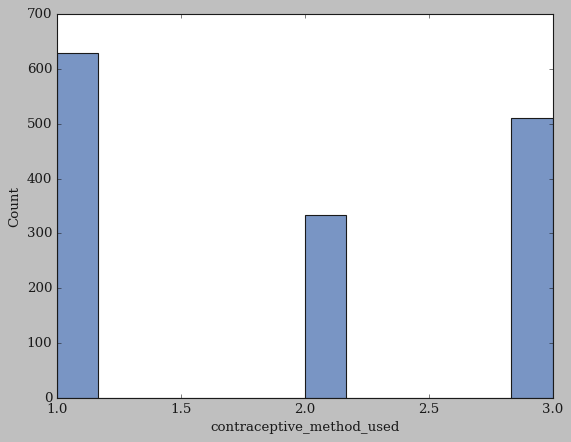

In [ ]:
df['contraceptive_method_used'].value_counts()
sns.histplot(df['contraceptive_method_used'])
plt.show()

The dataset contains 10 variables with 1473 observations in which there 9 predictors and 1 target (contraceptive_method_choice). All observations are integers and the dataset contains no missing values. The target has two types of value 1 (no-use), 2 (short-term) and 3 (long-term).This is a prediction by classifying if the woman's contraceptive method choice doesn't exist(no-use) ,is short-term method usage and long-term method. The observations per class are 629 for no-use, 511 for short-term method and 333 for long-term method.<b> So, the contraceptive_method_choice class is unbalanced.</b>

---




#### Descriptive Statistics

In [ ]:
df.describe()

,wife_age,wife_education,husband_education,number_children_ever_born,wife_religion,wife_working,husband_occupation,standard_living,media_exposure,contraceptive_method_used
count,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000
mean,32.538357,2.958588,3.429735,3.261371,0.850645,0.749491,2.137814,3.133741,0.073999,1.919891
std,8.227245,1.014994,0.816349,2.358549,0.356559,0.433453,0.864857,0.976161,0.261858,0.876376
min,16.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,26.000000,2.000000,3.000000,1.000000,1.000000,0.000000,1.000000,3.000000,0.000000,1.000000
50%,32.000000,3.000000,4.000000,3.000000,1.000000,1.000000,2.000000,3.000000,0.000000,2.000000
75%,39.000000,4.000000,4.000000,4.000000,1.000000,1.000000,3.000000,4.000000,0.000000,3.000000
max,49.000000,4.000000,4.000000,16.000000,1.000000,1.000000,4.000000,4.000000,1.000000,3.000000


The wife age ranges between 16 and 49. The average is around 32 years old. The standard deviation is around 8, so the observations of the wife_age variable are not too scattered. <b>We'll need to standardize predictors(to put them in a same range of values)</b>

In [ ]:
correlations = df.corr(method='pearson')
correlations.style.background_gradient()

,wife_age,wife_education,husband_education,number_children_ever_born,wife_religion,wife_working,husband_occupation,standard_living,media_exposure,contraceptive_method_used
wife_age,1.000000,-0.048011,-0.052879,0.540126,-0.139543,-0.039880,-0.202532,0.184485,0.113306,-0.162953
wife_education,-0.048011,1.000000,0.618369,-0.193839,-0.232973,-0.062200,-0.395921,0.361450,-0.336080,0.149777
husband_education,-0.052879,0.618369,1.000000,-0.187513,-0.178447,0.001099,-0.337003,0.357490,-0.288691,0.103226
number_children_ever_born,0.540126,-0.193839,-0.187513,1.000000,0.073917,0.097316,-0.023000,-0.006046,0.133658,0.082772
wife_religion,-0.139543,-0.232973,-0.178447,0.073917,1.000000,0.069837,0.084417,-0.196308,0.060243,-0.025271
wife_working,-0.039880,-0.062200,0.001099,0.097316,0.069837,1.000000,0.014232,-0.076505,0.001828,0.054438
husband_occupation,-0.202532,-0.395921,-0.337003,-0.023000,0.084417,0.014232,1.000000,-0.293831,0.113925,0.018161
standard_living,0.184485,0.361450,0.357490,-0.006046,-0.196308,-0.076505,-0.293831,1.000000,-0.251359,0.091149
media_exposure,0.113306,-0.336080,-0.288691,0.133658,0.060243,0.001828,0.113925,-0.251359,1.000000,-0.119206
contraceptive_method_used,-0.162953,0.149777,0.103226,0.082772,-0.025271,0.054438,0.018161,0.091149,-0.119206,1.000000


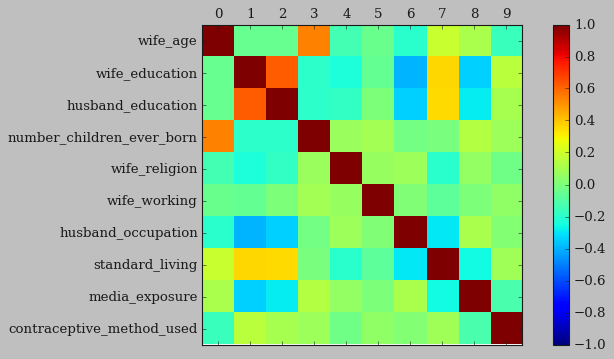

In [ ]:
""" Correlation matrix plot """
plt.style.use('classic')
plt.rcParams.update({ "font.family": "serif",})
fig = plt.figure(figsize=(10, 5))
ax = plt.axes()
cax = ax.matshow(correlations, vmin=-1, vmax=1)
cbar = fig.colorbar(cax)
ticks = np.arange(0,10,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_yticklabels(headers)
plt.show()

In [ ]:
pearsonr(df['wife_education'], df['husband_education'])

(0.6183686926065335, 3.9992075164271045e-156)

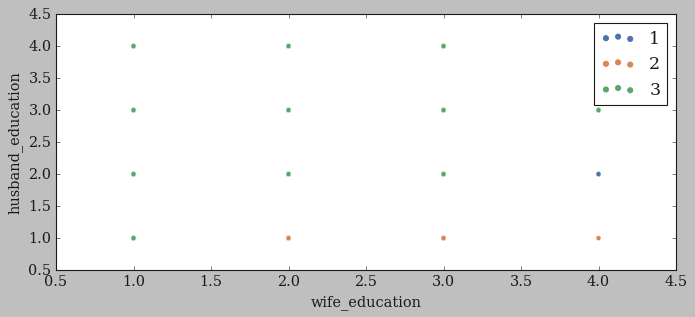

In [ ]:
plt.figure(figsize=(10, 4))
plt.rcParams.update({ "font.family": "serif", "font.size": 13})
sns.scatterplot(
    data=df, x="wife_education", y="husband_education", hue="contraceptive_method_used",
    palette = 'deep'
)
plt.legend()
plt.show()

In [ ]:
stat, p = pearsonr(df['wife_education'], df['husband_education'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.618, p=0.000
Probably dependent


This shows that the wife_education and the husband_eduction variables are moderately correlated. Others predictors than wife_education and husband_education are not correlated.<b>The correlation is given with a p-value under 0.001 though the scatter plot doesn't show that. The pearson test confirms that wife_education and husband_education are dependant</b> We can assume these other predictors are independant with the target.

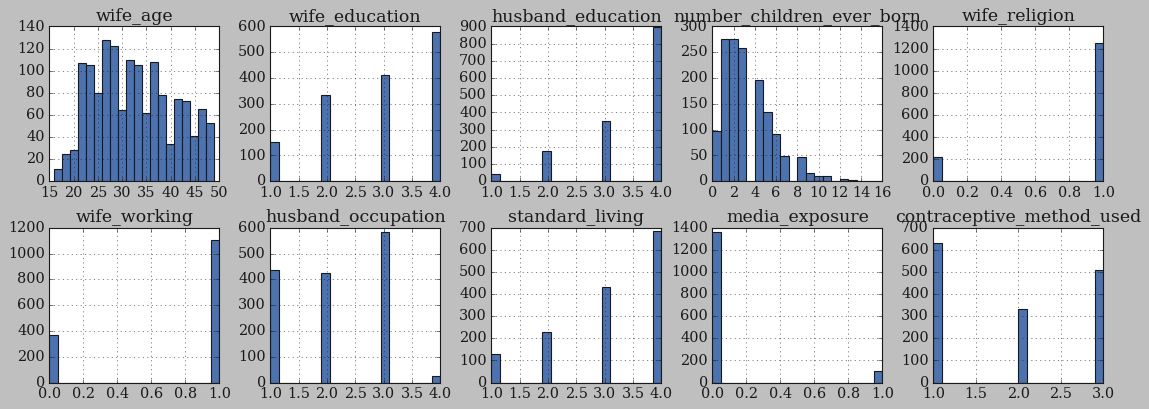

In [ ]:
df.hist(bins=20, layout=(5, 5), sharex=False, figsize=(17, 15))
plt.show()

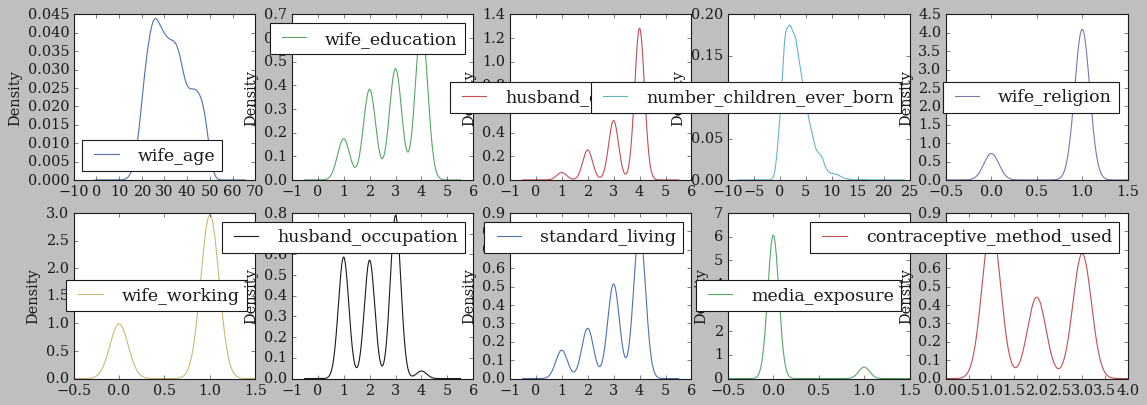

In [ ]:
df.plot(kind='density', subplots=True, layout=(5, 5), sharex=False, figsize=(17, 15))
plt.show()

This above plots show that  the predictors number children_ever_born and wife_age except the others seem to have a certain normal distribution.

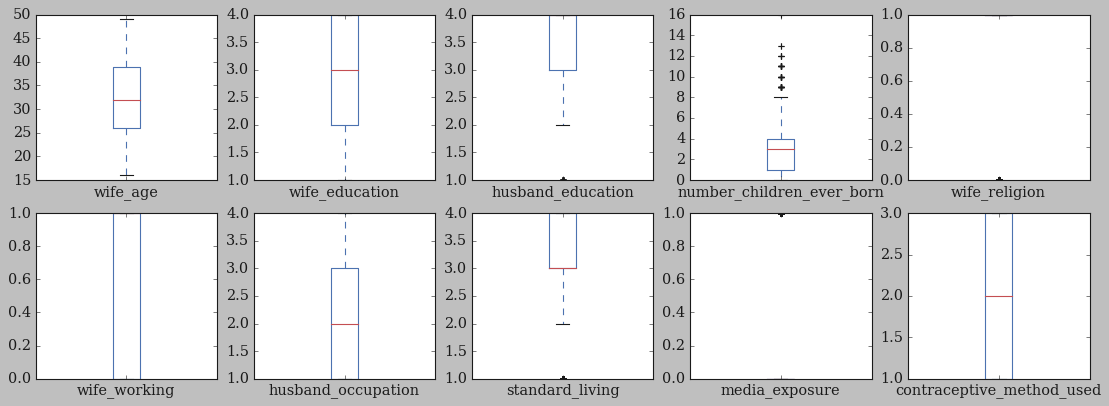

In [ ]:
df.plot(kind = 'box', subplots=True, layout=(5, 5), sharex=False, figsize=(17, 15))
plt.show()

The observations of wife_age predictors are well distributed, which is not the same case for others predictors.

#### Hypotheses Tests (Gaussianity)



    H0: the sample has a Gaussian distribution.
    H1: the sample does not have a Gaussian distribution.


##### The Shapiro Test

In [ ]:
for predictor_name in headers:
  stat, p = shapiro(df[predictor_name])
  if p > ALPHA:
    print(f'{predictor_name} probably Gaussian')
  else:
    print(f'{predictor_name} probably not Gaussian')

wife_age probably not Gaussian
wife_education probably not Gaussian
husband_education probably not Gaussian
number_children_ever_born probably not Gaussian
wife_religion probably not Gaussian
wife_working probably not Gaussian
husband_occupation probably not Gaussian
standard_living probably not Gaussian
media_exposure probably not Gaussian
contraceptive_method_used probably not Gaussian


##### The Normaltest Test

In [ ]:
for predictor_name in headers:
  stat, p = normaltest(df[predictor_name])
  if p > ALPHA:
    print(f'{predictor_name} probably Gaussian')
  else:
    print(f'{predictor_name} probably not Gaussian')

wife_age probably not Gaussian
wife_education probably not Gaussian
husband_education probably not Gaussian
number_children_ever_born probably not Gaussian
wife_religion probably not Gaussian
wife_working probably not Gaussian
husband_occupation probably not Gaussian
standard_living probably not Gaussian
media_exposure probably not Gaussian
contraceptive_method_used probably not Gaussian


<b>After these two hypotheses tests, we can confirm that no predictor is gaussian, has a normal distribution for a confidence interval of 95%.</b>

#### Hypotheses Tests (Independance)


    H0: the two samples are independent.
    H1: there is a dependency between the samples.


##### The Chi-Squared Test

In [ ]:
for predictor_name in headers:
    table = pd.crosstab( df['contraceptive_method_used'], df[predictor_name] )
    stat, p, dof, expected = chi2_contingency(table)
    if p > ALPHA:
      pass
      print(f'contraceptive_method_used & {predictor_name} are probably independent')
    else:
      print(f'contraceptive_method_used & {predictor_name} are probably dependent')

contraceptive_method_used & wife_age are probably dependent
contraceptive_method_used & wife_education are probably dependent
contraceptive_method_used & husband_education are probably dependent
contraceptive_method_used & number_children_ever_born are probably dependent
contraceptive_method_used & wife_religion are probably dependent
contraceptive_method_used & wife_working are probably independent
contraceptive_method_used & husband_occupation are probably dependent
contraceptive_method_used & standard_living are probably dependent
contraceptive_method_used & media_exposure are probably dependent
contraceptive_method_used & contraceptive_method_used are probably dependent


In [ ]:
for predictor_name1 in headers:
  for predictor_name2 in headers:
    table = pd.crosstab( df[predictor_name1], df[predictor_name2] )
    stat, p, dof, expected = chi2_contingency(table)
    # print('stat=%.3f, p=%.3f' % (stat, p))
    print(f'stat={np.round(stat, 3)}, p={np.round(p, 4)}')
    if p > ALPHA:
      pass
      print(f'{predictor_name1} & {predictor_name2} are probably independent')
    else:
      print(f'{predictor_name1} & {predictor_name2} are probably dependent')

stat=48609.0, p=0.0
wife_age & wife_age are probably dependent
stat=184.915, p=0.0
wife_age & wife_education are probably dependent
stat=147.353, p=0.0012
wife_age & husband_education are probably dependent
stat=1057.352, p=0.0
wife_age & number_children_ever_born are probably dependent
stat=79.9, p=0.0
wife_age & wife_religion are probably dependent
stat=40.569, p=0.1712
wife_age & wife_working are probably independent
stat=152.778, p=0.0004
wife_age & husband_occupation are probably dependent
stat=165.77, p=0.0
wife_age & standard_living are probably dependent
stat=63.572, p=0.0011
wife_age & media_exposure are probably dependent
stat=160.862, p=0.0
wife_age & contraceptive_method_used are probably dependent
stat=184.915, p=0.0
wife_education & wife_age are probably dependent
stat=4419.0, p=0.0
wife_education & wife_education are probably dependent
stat=708.965, p=0.0
wife_education & husband_education are probably dependent
stat=122.486, p=0.0
wife_education & number_children_ever_b

##### All predictors except wife_working and the target (contraceptive_method_used) are dependant. Then, we can assume that most accurate variables for predicting contraceptive_method_used target are all the predictors except <b>wife_working</b> with a confidence interval of 95%.

#### Data Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import(
    train_test_split, KFold, cross_val_score, RepeatedStratifiedKFold, GridSearchCV
)

from sklearn.linear_model import  LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import  SVC

from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score, mean_absolute_error
)

In [ ]:
X = df.drop('contraceptive_method_used', axis=1)
y = df["contraceptive_method_used"]
seed = 7

In [ ]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

##### Data Splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.3, random_state=seed)

In [ ]:
"""Algorithms to test """

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [ ]:
"""Printing training accuracy"""

results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  print(f"{name} accuracy ({cv_results.mean()}) std ({cv_results.std()})")

LR accuracy (0.5024458551157581) std (0.04671696912120075)
LDA accuracy (0.5082897684839432) std (0.06083694201233254)
KNN accuracy (0.45589058999253174) std (0.0418602306535058)
CART accuracy (0.43935772964899183) std (0.06350133637793472)
NB accuracy (0.4693894697535474) std (0.055064118376729795)
SVM accuracy (0.5372852875280059) std (0.02794542246596146)


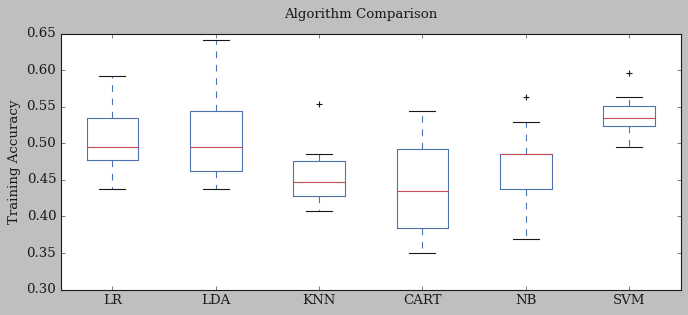

In [ ]:
""" Plotting Comparison """   
plt.style.use('classic')
plt.rcParams.update({ "font.family": "serif",})
fig = plt.figure(figsize=(10, 4))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.ylabel('Training Accuracy')
plt.show()

##### <b>The SVM (SVC) classifier has the largest training accuracy, but it's not good enough. Can we do better ?</b>



#### Parameters Tuning

###### Tuning LogisticRegression parameters (Regularization, max_iter)

###### <b> For penalty = l1 </b>

In [ ]:
max_iters = [1_000, 10_000, 100_000, 10000000]

for iter in max_iters:

  clf_l1_LR = LogisticRegression(penalty='l1', tol=0.01, solver='saga', max_iter=iter, multi_class='multinomial')
  kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
  cv_results = cross_val_score(clf_l1_LR, X_train, y_train, cv=kfold, scoring='accuracy')
  print(f'Accuracy ({cv_results.mean()}), std ({cv_results.std()})')

Accuracy (0.5024458551157581), std (0.04671696912120075)
Accuracy (0.5024458551157581), std (0.04671696912120075)
Accuracy (0.5024458551157581), std (0.04671696912120075)
Accuracy (0.5024458551157581), std (0.04671696912120075)


###### <b> For penalty = l2 </b>

In [ ]:
max_iters = [1_000, 10_000, 100_000, 10000000]

for iter in max_iters:

  clf_l2_LR = LogisticRegression(penalty='l2', tol=0.01, solver='newton-cg', max_iter=iter, multi_class='multinomial')
  kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
  cv_results = cross_val_score(clf_l2_LR, X_train, y_train, cv=kfold, scoring='accuracy')
  print(f'Accuracy ({cv_results.mean()}), std ({cv_results.std()})')

Accuracy (0.5024458551157581), std (0.04671696912120075)
Accuracy (0.5024458551157581), std (0.04671696912120075)
Accuracy (0.5024458551157581), std (0.04671696912120075)
Accuracy (0.5024458551157581), std (0.04671696912120075)


###### <b> For penalty = elasticnet </b>

In [ ]:
max_iters = [1_000, 10_000, 100_000, 10000000]
l1_ratio = 0.5

for iter in max_iters:
  clf_en_LR = LogisticRegression(penalty='elasticnet', solver='saga',l1_ratio=0.5, tol=0.01, max_iter=iter, multi_class='multinomial')

  kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
  cv_results = cross_val_score(clf_en_LR, X_train, y_train, cv=kfold, scoring='accuracy')
  print(f'Accuracy ({cv_results.mean()}), std ({cv_results.std()})')

Accuracy (0.5024458551157581), std (0.04671696912120075)
Accuracy (0.5024458551157581), std (0.04671696912120075)
Accuracy (0.5024458551157581), std (0.04671696912120075)
Accuracy (0.5024458551157581), std (0.04671696912120075)


##### No improvement, the training and test accuracy remain the same as in the default configuration.

##### """ Prediction Accuracy, confusion_matrix in default configuration """


In [ ]:
""" Prediction Accuracy, confusion_matrix in default configuration """
model = LogisticRegression()
fitted = model.fit(X_train, y_train)
y_hat = fitted.predict(X_test)

print(f"LogisticRegression\n Prediction Accuracy {accuracy_score(y_test, y_hat)} \n {confusion_matrix(y_test, y_hat)} \n {classification_report(y_test, y_hat)} ")

LogisticRegression
 Prediction Accuracy 0.5497737556561086 
 [[129  15  45]
 [ 28  34  32]
 [ 51  28  80]] 
               precision    recall  f1-score   support

           1       0.62      0.68      0.65       189
           2       0.44      0.36      0.40        94
           3       0.51      0.50      0.51       159

    accuracy                           0.55       442
   macro avg       0.52      0.52      0.52       442
weighted avg       0.54      0.55      0.54       442
 


In [ ]:
""" Prediction Accuracy, confusion_matrix in tuned configuration """

max_iters = [1_000, 10_000, 100_000, 10000000]

for iter in max_iters:
  model = LogisticRegression(penalty='l2', tol=0.01, solver='newton-cg', max_iter=iter, multi_class='multinomial')
  fitted = model.fit(X_train, y_train)
  y_hat = fitted.predict(X_test)
  print(f"Max_iterations : {iter}")
  print(f"{accuracy_score(y_test, y_hat)} \n {confusion_matrix(y_test, y_hat)} \n {classification_report(y_test, y_hat)} ")

Max_iterations : 1000
0.5497737556561086 
 [[129  15  45]
 [ 28  34  32]
 [ 51  28  80]] 
               precision    recall  f1-score   support

           1       0.62      0.68      0.65       189
           2       0.44      0.36      0.40        94
           3       0.51      0.50      0.51       159

    accuracy                           0.55       442
   macro avg       0.52      0.52      0.52       442
weighted avg       0.54      0.55      0.54       442
 
Max_iterations : 10000
0.5497737556561086 
 [[129  15  45]
 [ 28  34  32]
 [ 51  28  80]] 
               precision    recall  f1-score   support

           1       0.62      0.68      0.65       189
           2       0.44      0.36      0.40        94
           3       0.51      0.50      0.51       159

    accuracy                           0.55       442
   macro avg       0.52      0.52      0.52       442
weighted avg       0.54      0.55      0.54       442
 
Max_iterations : 100000
0.5497737556561086 
 [[129  1

##### No improvement, the training and test accuracy remain the same as in the default configuration.

###### <b>Tuning LDA parameters</b>

In [ ]:
model = LinearDiscriminantAnalysis()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = {'solver': ['svd', 'lsqr', 'eigen']}
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)
results = search.fit(X_train, y_train)
print('Training Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Training Accuracy: 0.501
Config: {'solver': 'lsqr'}


##### No improvement, the training and test accuracy remain the same as in the default configuration

In [ ]:
model = LinearDiscriminantAnalysis(solver='lsqr')
fit = model.fit(X_train, y_train)
y_hat = fit.predict(X_test)

print(f"LDA Prediction Accuracy {accuracy_score(y_test, y_hat)} \n {confusion_matrix(y_test, y_hat)} \n {classification_report(y_test, y_hat)} ")

LDA Prediction Accuracy 0.5475113122171946 
 [[125  17  47]
 [ 26  36  32]
 [ 48  30  81]] 
               precision    recall  f1-score   support

           1       0.63      0.66      0.64       189
           2       0.43      0.38      0.41        94
           3       0.51      0.51      0.51       159

    accuracy                           0.55       442
   macro avg       0.52      0.52      0.52       442
weighted avg       0.54      0.55      0.54       442
 


###### <b>The best LDA configuration is obtained with lsqr solver. The LDA does better than the LogisticRegression in both training and test accuracy</b>

###### <b>Tuning KNN parameters</b>

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_params = {
    'n_neighbors': list(range(1, 10)),
    'weights' : ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'],
    'metric' : ['euclidean', 'manhattan', 'minkowski'],
}

search = GridSearchCV(KNeighborsClassifier(n_jobs=-1), grid_params, scoring='accuracy', cv=cv, n_jobs=-1)
results = search.fit(X_train, y_train)
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Mean Accuracy: 0.513
Config: {'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}


###### This is better than the default configuration of KNeighborsClassifier. The best configuration is <b>Config: {'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}</b>
---



In [ ]:
model = KNeighborsClassifier(n_neighbors=9, weights='uniform',algorithm='ball_tree', metric='manhattan')
fit = model.fit(X_train, y_train)
y_hat = fit.predict(X_test)
print(f"KNN Prediction Accuracy {accuracy_score(y_test, y_hat)} \n Confusion Matrix \n {confusion_matrix(y_test, y_hat)} \n {classification_report(y_test, y_hat)} ")

KNN Prediction Accuracy 0.5067873303167421 
 Confusion Matrix 
 [[118  22  49]
 [ 35  36  23]
 [ 59  30  70]] 
               precision    recall  f1-score   support

           1       0.56      0.62      0.59       189
           2       0.41      0.38      0.40        94
           3       0.49      0.44      0.47       159

    accuracy                           0.51       442
   macro avg       0.49      0.48      0.48       442
weighted avg       0.50      0.51      0.50       442
 


##### Tuning CART DecisionTreeClassifier

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_params = {
    'criterion': ['entropy', 'gini'],
    'splitter' : ['best', 'random'],
}

search = GridSearchCV(DecisionTreeClassifier(), grid_params, scoring='accuracy', cv=cv, n_jobs=-1)
results = search.fit(X_train, y_train)
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Mean Accuracy: 0.469
Config: {'criterion': 'gini', 'splitter': 'best'}


<b>The DecisionTreeClassifier does not do better than the default configuration</b>

###### Tuning  SVM (*SVC*) parameters

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=seed)
param_grid = {'C': [0.1, 1, 10, 100, 1000, 10000, 100000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'decision_function_shape': ['ovo', 'ovr'],
              'kernel': ['linear', 'poly', 'rbf'] }
  
grid = GridSearchCV(SVC(shrinking=True), param_grid, scoring='accuracy', n_jobs=-1, refit=True,cv=cv, verbose=3) 
results = grid.fit(X_train, y_train) 

print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Fitting 30 folds for each of 210 candidates, totalling 6300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 374 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 922 tasks      | elapsed:   41.4s


This is better than the default configuration of SVM SVC classifier. The <b>training accuracy is 0.554 when the training accuracy of the default configuration is 0.5372.</b>

###### SVM (SVC) Prediction Accuracy 

In [ ]:
model = SVC(C=100, kernel='rbf', gamma=0.01, shrinking=True, probability=True)
fitted  = model.fit(X_train, y_train)

y_hat = fitted.predict(X_test)
print(f"SVM(SVC) Prediction Accuracy {accuracy_score(y_test, y_hat)} \n Confusion Matrix \n{confusion_matrix(y_test, y_hat)} \n {classification_report(y_test, y_hat)} ")

SVM(SVC) Prediction Accuracy 0.5497737556561086 
 Confusion Matrix 
[[119  17  53]
 [ 27  32  35]
 [ 40  27  92]] 
               precision    recall  f1-score   support

           1       0.64      0.63      0.63       189
           2       0.42      0.34      0.38        94
           3       0.51      0.58      0.54       159

    accuracy                           0.55       442
   macro avg       0.52      0.52      0.52       442
weighted avg       0.55      0.55      0.55       442
 


###### Prediction Accuray of all algorithms

In [ ]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA',  LinearDiscriminantAnalysis(solver='lsqr')))
models.append(('KNN', KNeighborsClassifier(n_neighbors=9,weights='uniform', algorithm='ball_tree', metric='manhattan')))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(C=100, kernel='rbf', gamma=0.01, shrinking=True, probability=True)))

In [ ]:
results = []
names = []
for name, model in models:
   kfold = KFold(n_splits=3)
   cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
   results.append(cv_results)
   names.append(name)

   fitted  = model.fit(X_train, y_train)
   y_hat = fitted.predict(X_test)
   print(f"{name} Training TAccuracy ({name, cv_results.mean()}) STD ({cv_results.std()})")
   print(f"{name} Prediction Accuracy {accuracy_score(y_test, y_hat)} \n {confusion_matrix(y_test, y_hat)} \n {classification_report(y_test, y_hat)} ")

LR Training TAccuracy (('LR', 0.5014520758469501)) STD (0.01204472373125255)
LR Prediction Accuracy 0.5497737556561086 
 [[129  15  45]
 [ 28  34  32]
 [ 51  28  80]] 
               precision    recall  f1-score   support

           1       0.62      0.68      0.65       189
           2       0.44      0.36      0.40        94
           3       0.51      0.50      0.51       159

    accuracy                           0.55       442
   macro avg       0.52      0.52      0.52       442
weighted avg       0.54      0.55      0.54       442
 
LDA Training TAccuracy (('LDA', 0.5062970370872601)) STD (0.014159338602236617)
LDA Prediction Accuracy 0.5475113122171946 
 [[125  17  47]
 [ 26  36  32]
 [ 48  30  81]] 
               precision    recall  f1-score   support

           1       0.63      0.66      0.64       189
           2       0.43      0.38      0.41        94
           3       0.51      0.51      0.51       159

    accuracy                           0.55       442
   m

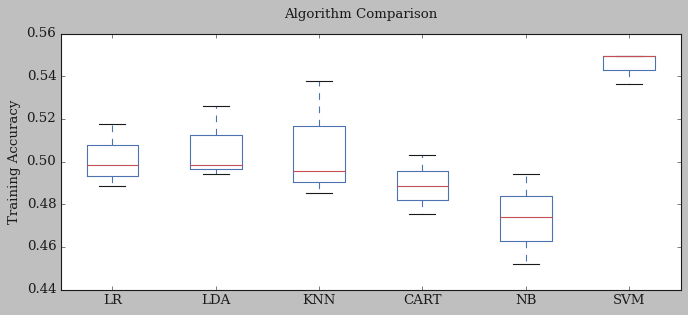

In [ ]:
""" Plotting Comparison """   
plt.style.use('classic')
plt.rcParams.update({ "font.family": "serif",})
fig = plt.figure(figsize=(10, 4))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.ylabel('Training Accuracy')

ax.set_xticklabels(names)
plt.show()

##### The SVM (SVC) does <b>much better than all other tested algorithms with a training accuracy of 0.545 and 0.5497 as testing accuracy</b>". Can we do better again ?

In [ ]:
from sklearn.neural_network import  MLPClassifier

In [ ]:
fitted = model.fit(X_train, y_train)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=seed)
kfold = KFold(n_splits=3)
cv_results = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
print(cv_results.mean(), cv_results.std())

0.5483694299228279 0.045729440773290206


In [ ]:
model = MLPClassifier(random_state=seed, hidden_layer_sizes=100, activation='tanh',
                      solver='lbfgs', alpha=0.0001,max_iter = 10000,
                      )
fitted = model.fit(X_train, y_train)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=seed)
# kfold = KFold(n_splits=3)
cv_results = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
print(cv_results.mean(), cv_results.std())

0.44977284042818017 0.038983944694990016


##### The neuronal network MLPClassifier is worse for both training and prediction accuracy

In [ ]:
from sklearn.ensemble import(
    BaggingClassifier, RandomForestClassifier,ExtraTreesClassifier
)

In [ ]:
ensembles = []
ensembles.append(('BCL', BaggingClassifier()))
ensembles.append(('RFCL', RandomForestClassifier()))
ensembles.append(('ETCL', ExtraTreesClassifier()))

In [ ]:
results = []
names = []
for name, ensemble in ensembles:
    kfold = KFold(n_splits=3)
    
    cv_results = cross_val_score(ensemble, X_train, y_train, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    print(f"{name} Training accuracy ({cv_results.mean()}) SDT ({cv_results.std()})")

BCL Training accuracy (0.5276205166451963) SDT (0.020991380981062794)
RFCL Training accuracy (0.5237417226026624) SDT (0.022898435986844438)
ETCL Training accuracy (0.5024069428435826) SDT (0.017632193726554467)


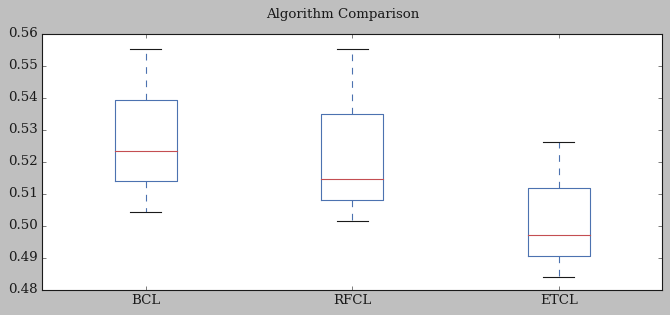

In [ ]:
""" Plotting Comparison """   
plt.style.use('seaborn-deep')
plt.rcParams.update({ "font.family": "serif",})
fig = plt.figure(figsize=(10, 4))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

###### <b> The RandomForestClassifier performs better as the SVM (SVC) classifier<b>.


### <b>Feature Selection</b>

In [ ]:
X = df.drop('contraceptive_method_used', axis=1)
y = df["contraceptive_method_used"]
from sklearn.feature_selection import SelectKBest, chi2

###### Predictors Selection with <b>chi2</b>

In [ ]:
best = SelectKBest(score_func=chi2, k=3)
X_NEW = best.fit_transform(X, y)

X_NEW_train, X_NEW_test, y_new_train, y_new_test = train_test_split(X_NEW, y, test_size=0.3,random_state=seed)

""" Adding Algorithms """
models = []
models.append(('LR', LogisticRegression(max_iter=1000)))
models.append(('LDA',  LinearDiscriminantAnalysis(solver='lsqr')))
models.append(('KNN', KNeighborsClassifier(n_neighbors=9,weights='uniform', algorithm='ball_tree', metric='manhattan')))
models.append(('SVM', SVC(C=100, kernel='rbf', gamma=0.01, shrinking=True, probability=True)))
models.append(('RFCL', RandomForestClassifier(criterion='entropy')))

""" Cross_validation """
results = []
names = []
for name, model in models:
   kfold = KFold(n_splits=3)

   cv_results = cross_val_score(model, X_NEW_train, y_new_train, cv=kfold, scoring='accuracy')
   results.append(cv_results)
   names.append(name)

   fitted  = model.fit(X_NEW_train, y_new_train)
   y_hat = fitted.predict(X_NEW_test)
   print(f"{name} Training TAccuracy ({name, cv_results.mean()}) STD ({cv_results.std()})")
   print(f"{name} Prediction Accuracy {accuracy_score(y_new_test, y_hat)} \n {confusion_matrix(y_new_test, y_hat)} \n {classification_report(y_new_test, y_hat)} ")

LR Training TAccuracy (('LR', 0.5111391732772843)) STD (0.020909585978784895)
LR Prediction Accuracy 0.5384615384615384 
 [[129  17  43]
 [ 25  34  35]
 [ 56  28  75]] 
               precision    recall  f1-score   support

           1       0.61      0.68      0.65       189
           2       0.43      0.36      0.39        94
           3       0.49      0.47      0.48       159

    accuracy                           0.54       442
   macro avg       0.51      0.51      0.51       442
weighted avg       0.53      0.54      0.53       442
 
LDA Training TAccuracy (('LDA', 0.5140433249711844)) STD (0.018482642723126334)
LDA Prediction Accuracy 0.5497737556561086 
 [[127  17  45]
 [ 24  35  35]
 [ 54  24  81]] 
               precision    recall  f1-score   support

           1       0.62      0.67      0.64       189
           2       0.46      0.37      0.41        94
           3       0.50      0.51      0.51       159

    accuracy                           0.55       442
   

In [ ]:
""" Cross_validation """
results = []
names = []
for name, model in models:
   kfold = KFold(n_splits=3)

   cv_results = cross_val_score(model, X_NEW_train, y_new_train, cv=kfold, scoring='accuracy')
   results.append(cv_results)
   names.append(name)

   fitted  = model.fit(X_NEW_train, y_new_train)
   y_hat = fitted.predict(X_NEW_test)
   print(f"{name} Training TAccuracy ({name, cv_results.mean()}) STD ({cv_results.std()})")
   print(f"{name} Prediction Accuracy {accuracy_score(y_new_test, y_hat)} \n {confusion_matrix(y_new_test, y_hat)} \n {classification_report(y_new_test, y_hat)} ")


LR Training TAccuracy (('LR', 0.5111391732772843)) STD (0.020909585978784895)
LR Prediction Accuracy 0.5384615384615384 
 [[129  17  43]
 [ 25  34  35]
 [ 56  28  75]] 
               precision    recall  f1-score   support

           1       0.61      0.68      0.65       189
           2       0.43      0.36      0.39        94
           3       0.49      0.47      0.48       159

    accuracy                           0.54       442
   macro avg       0.51      0.51      0.51       442
weighted avg       0.53      0.54      0.53       442
 
LDA Training TAccuracy (('LDA', 0.5140433249711844)) STD (0.018482642723126334)
LDA Prediction Accuracy 0.5497737556561086 
 [[127  17  45]
 [ 24  35  35]
 [ 54  24  81]] 
               precision    recall  f1-score   support

           1       0.62      0.67      0.64       189
           2       0.46      0.37      0.41        94
           3       0.50      0.51      0.51       159

    accuracy                           0.55       442
   

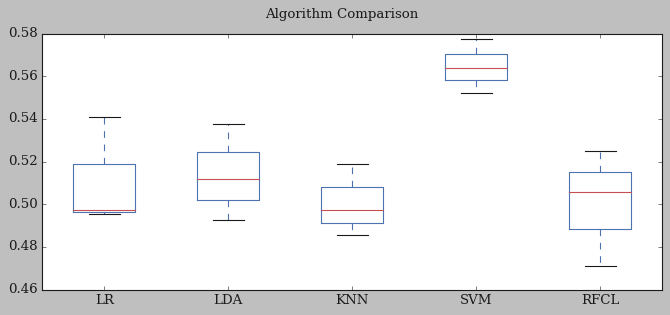

In [ ]:
""" Plot Algorithms Comparison """
""" Plotting Comparison """   
plt.style.use('classic')
plt.rcParams.update({ "font.family": "serif",})
fig = plt.figure(figsize=(10, 4))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

<b>The SVM (SVC) remains much better than other algorithms for k predictors, k = 3.</b>

<b> Seek the best k fold </b>

In [ ]:
list_training_error = []
list_testing_error = []
data = df.values
X = data[:, :9]
y = data[:, 9]

kf = KFold(n_splits=20)

for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  model = SVC(C=100, kernel='rbf', gamma=0.01, shrinking=True, probability=True)
  
  model.fit(X_train, y_train)
  y_train_data_pred = model.predict(X_train)
  y_test_data_pred = model.predict(X_test)

  fold_training_error = mean_absolute_error(y_train, y_train_data_pred) 
  fold_testing_error = mean_absolute_error(y_test, y_test_data_pred)

  list_training_error.append(fold_training_error)
  list_testing_error.append(fold_testing_error)

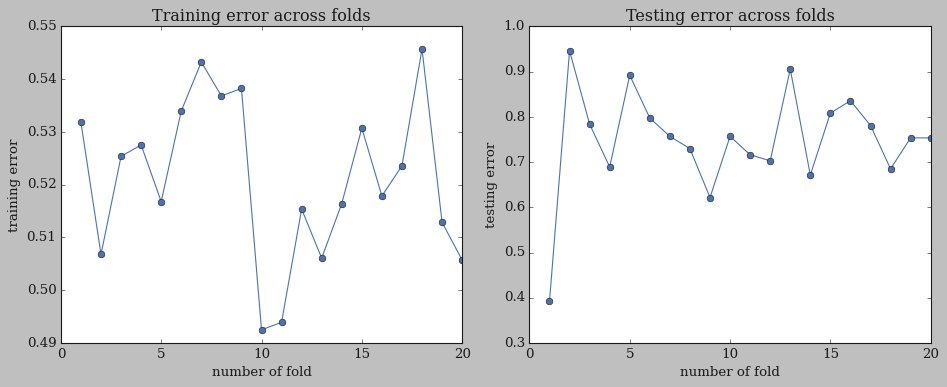

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_training_error).ravel(), 'o-')
plt.xlabel('number of fold')
plt.ylabel('training error')
plt.title('Training error across folds')
plt.tight_layout()
plt.subplot(1,2,2)
plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_testing_error).ravel(), 'o-')
plt.xlabel('number of fold')
plt.ylabel('testing error')
plt.title('Testing error across folds')
plt.tight_layout()
plt.show()

##### <b>It's k = 3 as used in the cross_validation of SVC Classifier.</b> Can we improve with PCA

Text(0.5, 0, 'Principal Component #')

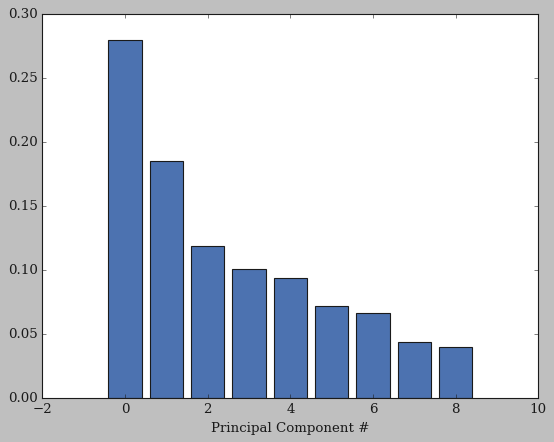

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(scaled_X)

exp_variance = pca.explained_variance_ratio_
fig, ax = plt.subplots()
ax.bar(range(pca.n_components_), exp_variance)
ax.set_xlabel('Principal Component #')

It's not clear to see where the elbow appears, but take 6 components of 85%.

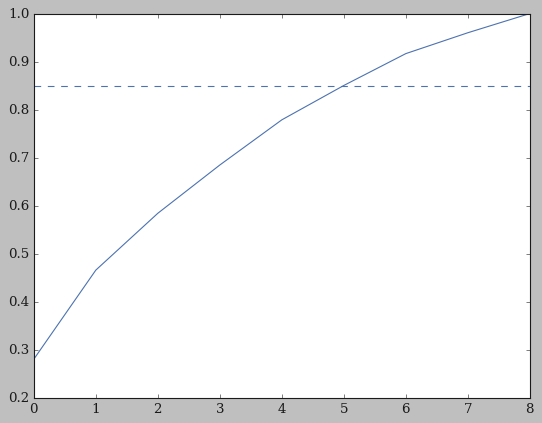

In [ ]:
cum_exp_variance = np.cumsum(exp_variance)

fig, ax = plt.subplots()
ax.plot(cum_exp_variance)
ax.axhline(y=0.85, linestyle='--')

n_components = 6

pca = PCA(n_components, random_state=seed)
pca.fit(scaled_X)
pca_projection = pca.transform(scaled_X)

In [ ]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    pca_projection, df['contraceptive_method_used'], random_state=seed,
)

In [ ]:
model = SVC()
fitted  = model.fit(X_train_pca, y_train_pca)

cross_val_results = cross_val_score(model, X_train_pca, y_train_pca, scoring='accuracy', cv=KFold(n_splits=3))
print(cross_val_results.mean(), cross_val_results.std())

y_hat_pca = fitted.predict(X_test_pca)
print(f"PCA SVM(SVC) Prediction Accuracy {accuracy_score(y_test_pca, y_hat_pca)} \n Confusion Matrix \n{confusion_matrix(y_test_pca, y_hat_pca)} \n {classification_report(y_test_pca, y_hat_pca)} ")

0.509963768115942 0.014264507018137335
PCA SVM(SVC) Prediction Accuracy 0.5176151761517616 
 Confusion Matrix 
[[110  19  31]
 [ 36  23  15]
 [ 57  20  58]] 
               precision    recall  f1-score   support

           1       0.54      0.69      0.61       160
           2       0.37      0.31      0.34        74
           3       0.56      0.43      0.49       135

    accuracy                           0.52       369
   macro avg       0.49      0.48      0.48       369
weighted avg       0.51      0.52      0.51       369
 


<b>This is not better than the chi2 feature selection.</b> Let's balance the classes ?

###### <>With stratify arg<>

In [ ]:
X = df.drop('contraceptive_method_used', axis=1)
scaled_X = scaler.fit_transform(X)
y = df["contraceptive_method_used"]
X_bal_train, X_bal_test, y_bal_train, y_bal_test = train_test_split(scaled_X, y, test_size=0.2, random_state=seed,stratify=y)

In [ ]:
model = SVC(C=100, kernel='rbf', gamma=0.01, shrinking=True, probability=True)
fitted  = model.fit(X_bal_train, y_bal_train)
cross_val_results = cross_val_score(model, X_bal_train, y_bal_train, scoring='accuracy', cv=KFold(n_splits=10))
print(f"SVM(SVC) \nTraining Accuracy ({cross_val_results.mean()}), STD ({cross_val_results.std()})")

y_hat_pca = fitted.predict(X_bal_test)
print(f"Prediction Accuracy {accuracy_score(y_bal_test, y_hat_pca)} \n Confusion Matrix \n{confusion_matrix(y_bal_test, y_hat_pca)} \n {classification_report(y_bal_test, y_hat_pca)} ")

SVM(SVC) 
Training Accuracy (0.5331087932782849), STD (0.04023631437416659)
Prediction Accuracy 0.5796610169491525 
 Confusion Matrix 
[[83  7 36]
 [15 28 24]
 [26 16 60]] 
               precision    recall  f1-score   support

           1       0.67      0.66      0.66       126
           2       0.55      0.42      0.47        67
           3       0.50      0.59      0.54       102

    accuracy                           0.58       295
   macro avg       0.57      0.55      0.56       295
weighted avg       0.58      0.58      0.58       295
 


###### <b> Balancing the data by sampling </b>

In [ ]:
df_class_1 = df[df['contraceptive_method_used'] == 1]
df_class_2 = df[df['contraceptive_method_used'] == 2]
df_class_3 = df[df['contraceptive_method_used'] == 3]

df_class_2 = df_class_2.sample(df_class_1.shape[0], replace=True, random_state=seed)
df_class_3 = df_class_3.sample(df_class_1.shape[0], replace=True, random_state=seed)

In [ ]:
data = pd.concat([df_class_1, df_class_2, df_class_3])
print(data['contraceptive_method_used'].value_counts())

3    629
2    629
1    629
Name: contraceptive_method_used, dtype: int64


<b>The classes are now well balanced</b>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    scaler.fit_transform(data.drop('contraceptive_method_used', axis=1)), data['contraceptive_method_used'],
    test_size=0.3, random_state=seed, stratify=data['contraceptive_method_used']
)

In [ ]:
model = SVC(C=100, kernel='rbf', gamma=0.01, shrinking=True, probability=True)

fitted  = model.fit(X_train, y_train)
cross_val_results = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=KFold(n_splits=10))
print(f"SVM(SVC) \nTraining Accuracy ({cross_val_results.mean()}), STD ({cross_val_results.std()})")

y_hat = fitted.predict(X_test)
print(f"Prediction Accuracy {accuracy_score(y_test, y_hat)} \n Confusion Matrix \n{confusion_matrix(y_test, y_hat)} \n {classification_report(y_test, y_hat)} ")

SVM(SVC) 
Training Accuracy (0.5924242424242425), STD (0.050570664449329214)
Prediction Accuracy 0.6014109347442681 
 Confusion Matrix 
[[ 94  57  38]
 [ 19 141  29]
 [ 22  61 106]] 
               precision    recall  f1-score   support

           1       0.70      0.50      0.58       189
           2       0.54      0.75      0.63       189
           3       0.61      0.56      0.59       189

    accuracy                           0.60       567
   macro avg       0.62      0.60      0.60       567
weighted avg       0.62      0.60      0.60       567
 


<b>The SVM (SVC) does more much better than the unbalanced case.</b> Can we have better ?

<b>Chi2 Feature Selection after balancing classes</b>

In [ ]:
best = SelectKBest(score_func=chi2, k=7)
y = data['contraceptive_method_used']
X = data.drop('contraceptive_method_used', axis=1)
X_NEW = best.fit_transform(X, y)

X_NEW_train, X_NEW_test, y_new_train, y_new_test = train_test_split(
    X_NEW, y, test_size=0.3, random_state=seed, stratify=data['contraceptive_method_used'],
    )

""" Adding Algorithms """
models = []
models.append(('LR', LogisticRegression(max_iter=1000)))
models.append(('LDA',  LinearDiscriminantAnalysis(solver='lsqr')))
models.append(('KNN', KNeighborsClassifier(n_neighbors=9,weights='uniform', algorithm='ball_tree', metric='manhattan')))
models.append(('SVM', SVC(C=100, kernel='rbf', gamma=0.01, shrinking=True, probability=True)))
models.append(('RFCL', RandomForestClassifier()))

In [ ]:
""" Cross_validation """
results = []
names = []
for name, model in models:
   kfold = RepeatedStratifiedKFold(n_splits=13, n_repeats=3, random_state=seed)

   cv_results = cross_val_score(model, X_NEW_train, y_new_train, cv=kfold, scoring='accuracy')
   results.append(cv_results)
   names.append(name)

   fitted  = model.fit(X_NEW_train, y_new_train)
   y_hat = fitted.predict(X_NEW_test)
   print(f"{name} Training Accuracy ({name, cv_results.mean()}) STD ({cv_results.std()})")
   print(f"{name} Prediction Accuracy {accuracy_score(y_new_test, y_hat)} \n {confusion_matrix(y_new_test, y_hat)} \n {classification_report(y_new_test, y_hat)} ")

LR Training Accuracy (('LR', 0.517646561036194)) STD (0.05129939166311512)
LR Prediction Accuracy 0.5291005291005291 
 [[ 93  47  49]
 [ 22 120  47]
 [ 45  57  87]] 
               precision    recall  f1-score   support

           1       0.58      0.49      0.53       189
           2       0.54      0.63      0.58       189
           3       0.48      0.46      0.47       189

    accuracy                           0.53       567
   macro avg       0.53      0.53      0.53       567
weighted avg       0.53      0.53      0.53       567
 
LDA Training Accuracy (('LDA', 0.5184355539626361)) STD (0.04934839472044848)
LDA Prediction Accuracy 0.5255731922398589 
 [[ 90  47  52]
 [ 17 118  54]
 [ 43  56  90]] 
               precision    recall  f1-score   support

           1       0.60      0.48      0.53       189
           2       0.53      0.62      0.58       189
           3       0.46      0.48      0.47       189

    accuracy                           0.53       567
   macro

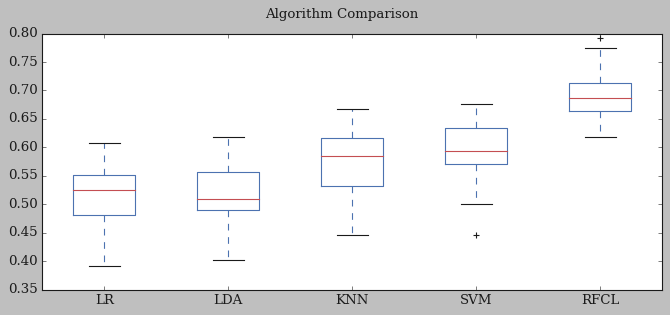

In [ ]:
""" Plot Algorithms Comparison """
""" Plotting Comparison """   
plt.style.use('classic')
plt.rcParams.update({ "font.family": "serif",})
fig = plt.figure(figsize=(10, 4))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

###### <b> The RandomForestClassifier does much better than the SVC classifier as shown by the plot above</b>

#### Let's check again PCA

Text(0.5, 0, 'Principal Component #')

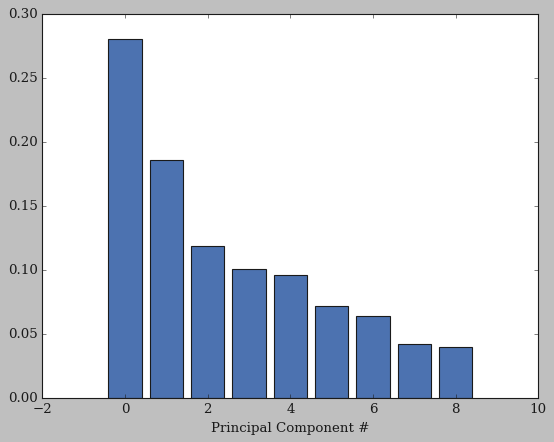

In [ ]:
pca = PCA()
pca.fit(scaler.fit_transform(data.drop('contraceptive_method_used', axis=1)))

exp_variance = pca.explained_variance_ratio_
fig, ax = plt.subplots()
ax.bar(range(pca.n_components_), exp_variance)
ax.set_xlabel('Principal Component #')

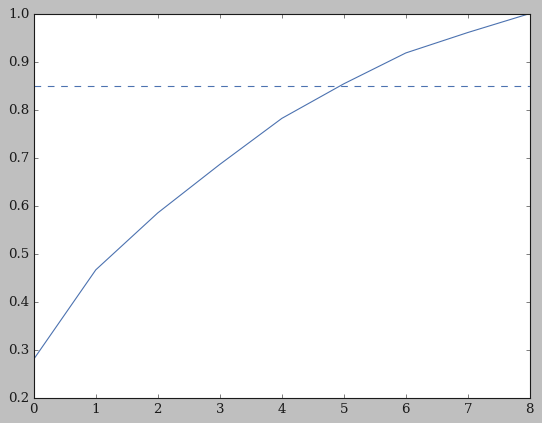

In [ ]:
cum_exp_variance = np.cumsum(exp_variance)

fig, ax = plt.subplots()
ax.plot(cum_exp_variance)
ax.axhline(y=0.85, linestyle='--')
n_components = 6
pca = PCA(n_components, random_state=seed)
pca.fit(scaled_X)
pca_projection = pca.transform(scaled_X)

In [ ]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    pca_projection, df['contraceptive_method_used'], random_state=seed,
)

model = SVC(C=100, kernel='rbf', gamma=0.01, shrinking=True, probability=True)
fitted  = model.fit(X_train_pca, y_train_pca)

cross_val_results = cross_val_score(model, X_train_pca, y_train_pca, scoring='accuracy', cv=KFold(n_splits=16))
print(cross_val_results.mean(), cross_val_results.std())

y_hat_pca = fitted.predict(X_test_pca)
print(f"PCA SVM(SVC) Prediction Accuracy {accuracy_score(y_test_pca, y_hat_pca)} \n Confusion Matrix \n{confusion_matrix(y_test_pca, y_hat_pca)} \n {classification_report(y_test_pca, y_hat_pca)} ")

0.5054347826086957 0.06103217582580805
PCA SVM(SVC) Prediction Accuracy 0.4986449864498645 
 Confusion Matrix 
[[100  17  43]
 [ 35  22  17]
 [ 53  20  62]] 
               precision    recall  f1-score   support

           1       0.53      0.62      0.57       160
           2       0.37      0.30      0.33        74
           3       0.51      0.46      0.48       135

    accuracy                           0.50       369
   macro avg       0.47      0.46      0.46       369
weighted avg       0.49      0.50      0.49       369
 


<b>This is worse according to the previous algorithms. Then, by conclusion, the better model is obtained with k = 7 features(chi2 selection) with RandomForestClassifier.</b>

In [ ]:
list_training_error = []
list_testing_error = []
values = data.values
X = values[:, :7]
y = values[:, 9]

kf = KFold(n_splits=20)

for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  model = RandomForestClassifier()
  
  model.fit(X_train, y_train)
  y_train_data_pred = model.predict(X_train)
  y_test_data_pred = model.predict(X_test)

  fold_training_error = mean_absolute_error(y_train, y_train_data_pred) 
  fold_testing_error = mean_absolute_error(y_test, y_test_data_pred)

  list_training_error.append(fold_training_error)
  list_testing_error.append(fold_testing_error)

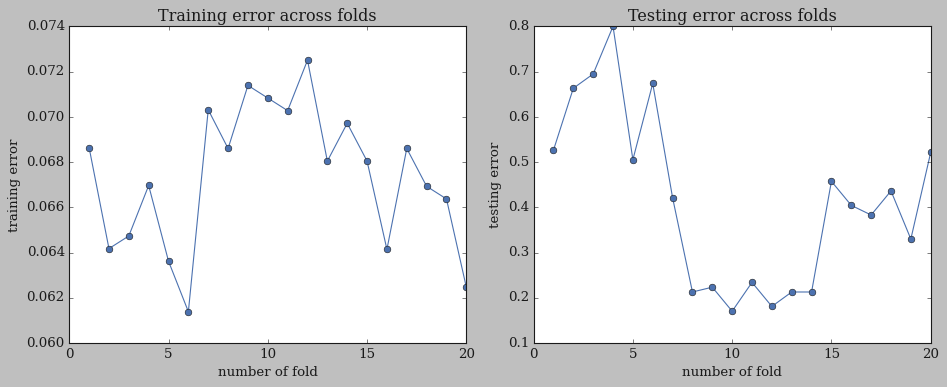

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_training_error).ravel(), 'o-')
plt.xlabel('number of fold')
plt.ylabel('training error')
plt.title('Training error across folds')
plt.tight_layout()
plt.subplot(1,2,2)
plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_testing_error).ravel(), 'o-')
plt.xlabel('number of fold')
plt.ylabel('testing error')
plt.title('Testing error across folds')
plt.tight_layout()
plt.show()

<b>The best kfold value is between 15 and 17 for cross validation</b>

In [ ]:
best = SelectKBest(score_func=chi2, k=7)
y = data['contraceptive_method_used']
X = data.drop('contraceptive_method_used', axis=1)
X_NEW = best.fit_transform(X, y)

X_NEW_train, X_NEW_test, y_new_train, y_new_test = train_test_split(
    X_NEW, y, test_size=0.3, random_state=seed,
    )

model = RandomForestClassifier()
""" Cross_validation """

cv_results = cross_val_score(model, X_NEW_train, y_new_train, cv=KFold(n_splits=16), scoring='accuracy')
fitted  = model.fit(X_NEW_train, y_new_train)
y_hat = fitted.predict(X_NEW_test)

print(f"RFCL Training Accuracy ({cv_results.mean()}) STD ({cv_results.std()})")
print(f"RFCL Prediction Accuracy {accuracy_score(y_new_test, y_hat)} \n {confusion_matrix(y_new_test, y_hat)} \n {classification_report(y_new_test, y_hat)} ")

RFCL Training Accuracy (0.71436967381722) STD (0.0457749837425683)
RFCL Prediction Accuracy 0.691358024691358 
 [[117  30  52]
 [  2 152  36]
 [ 23  32 123]] 
               precision    recall  f1-score   support

           1       0.82      0.59      0.69       199
           2       0.71      0.80      0.75       190
           3       0.58      0.69      0.63       178

    accuracy                           0.69       567
   macro avg       0.71      0.69      0.69       567
weighted avg       0.71      0.69      0.69       567
 


<b>The RFCL wins and the needed predictors are the seven obtained with chi2 for feature selection for predicting with an accuracy of 0.714 and the confusion matrix is much better than the one of the SVM (SVC) and other algorithms</b>.



#### Ensemble with balanced class ( Contraceptive_method_used ) and chi2 feature selection

In [ ]:
best = SelectKBest(score_func=chi2, k=7)
y = data['contraceptive_method_used']
X = data.drop('contraceptive_method_used', axis=1)
X_NEW = best.fit_transform(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_NEW, y, test_size=0.3, random_state=seed)

In [ ]:
results = []
names = []
for name, ensemble in ensembles:
    kfold = KFold(n_splits=16)
    
    cv_results = cross_val_score(ensemble, X_train, y_train, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)

    fitted  = ensemble.fit(X_train, y_train)
    y_hat = fitted.predict(X_test)

    print(f"{name} Error Test Rate {((y_hat != y_test).sum())/data.shape[0]*100}")
    print(f"{name} Training accuracy ({cv_results.mean()}) SDT ({cv_results.std()})")
    print(f"{name} Prediction Accuracy {accuracy_score(y_test, y_hat)} \n {confusion_matrix(y_test, y_hat)} \n {classification_report(y_test, y_hat)} ")

BCL Error Test Rate 9.75092739798622
BCL Training accuracy (0.7151318689391712) SDT (0.04237771045327258)
BCL Prediction Accuracy 0.6754850088183422 
 [[114  33  52]
 [  9 148  33]
 [ 29  28 121]] 
               precision    recall  f1-score   support

           1       0.75      0.57      0.65       199
           2       0.71      0.78      0.74       190
           3       0.59      0.68      0.63       178

    accuracy                           0.68       567
   macro avg       0.68      0.68      0.67       567
weighted avg       0.68      0.68      0.67       567
 
RFCL Error Test Rate 9.485956544780075
RFCL Training accuracy (0.7090067587422862) SDT (0.0473267077219026)
RFCL Prediction Accuracy 0.6843033509700176 
 [[117  34  48]
 [  5 152  33]
 [ 25  34 119]] 
               precision    recall  f1-score   support

           1       0.80      0.59      0.68       199
           2       0.69      0.80      0.74       190
           3       0.59      0.67      0.63       178


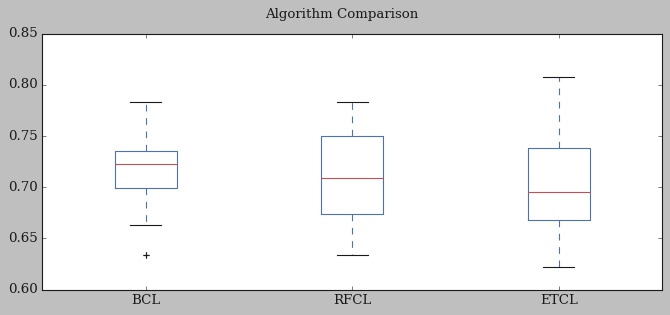

In [ ]:
""" Plotting Comparison """   
plt.style.use('seaborn-deep')
plt.rcParams.update({ "font.family": "serif",})
fig = plt.figure(figsize=(10, 4))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### <b>Conclusion : compare to other ensemble algorithms and SVM (SVC), RandomForestClassifier remains the best with 9% as test error rate, the best training and prediction accuracy and the confusion matrix.</b>

#### <b> Test the first 7 predictors of the balanced dataframe </b>

In [ ]:
df_balanced = data.values
X_balanced = df_balanced[:,:7]
y_balanced = df_balanced[:,9]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=seed)

model = RandomForestClassifier()
""" Cross_validation """

cv_results = cross_val_score(model, X_train, y_train, cv=KFold(n_splits=16), scoring='accuracy')
fitted  = model.fit(X_train, y_train)
y_hat = fitted.predict(X_test)

print(f"RFCL Training Accuracy ({cv_results.mean()}) STD ({cv_results.std()})")
print(f"RFCL Prediction Accuracy {accuracy_score(y_test, y_hat)} \n {confusion_matrix(y_test, y_hat)} \n {classification_report(y_test, y_hat)} ")

RFCL Training Accuracy (0.705214149280047) STD (0.045555353760418194)
RFCL Prediction Accuracy 0.7001763668430335 
 [[114  32  53]
 [  5 158  27]
 [ 26  27 125]] 
               precision    recall  f1-score   support

           1       0.79      0.57      0.66       199
           2       0.73      0.83      0.78       190
           3       0.61      0.70      0.65       178

    accuracy                           0.70       567
   macro avg       0.71      0.70      0.70       567
weighted avg       0.71      0.70      0.70       567
 


In [ ]:
results = []
names = []
for name, ensemble in ensembles:
    kfold = KFold(n_splits=16)
    
    cv_results = cross_val_score(ensemble, X_train, y_train, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)

    fitted  = ensemble.fit(X_train, y_train)
    y_hat = fitted.predict(X_test)

    print(f"{name} Error Test Rate {((y_hat != y_test).sum())/data.shape[0]*100}")
    print(f"{name} Training accuracy ({cv_results.mean()}) SDT ({cv_results.std()})")
    print(f"{name} Prediction Accuracy {accuracy_score(y_test, y_hat)} \n {confusion_matrix(y_test, y_hat)} \n {classification_report(y_test, y_hat)} ")

BCL Error Test Rate 9.85691573926868
BCL Training accuracy (0.6855807375844842) SDT (0.04412701432757811)
BCL Prediction Accuracy 0.671957671957672 
 [[110  35  54]
 [ 10 152  28]
 [ 25  34 119]] 
               precision    recall  f1-score   support

           1       0.76      0.55      0.64       199
           2       0.69      0.80      0.74       190
           3       0.59      0.67      0.63       178

    accuracy                           0.67       567
   macro avg       0.68      0.67      0.67       567
weighted avg       0.68      0.67      0.67       567
 
RFCL Error Test Rate 8.744038155802862
RFCL Training accuracy (0.7014123567440493) SDT (0.040197055871348454)
RFCL Prediction Accuracy 0.708994708994709 
 [[116  32  51]
 [  4 160  26]
 [ 25  27 126]] 
               precision    recall  f1-score   support

           1       0.80      0.58      0.67       199
           2       0.73      0.84      0.78       190
           3       0.62      0.71      0.66       178


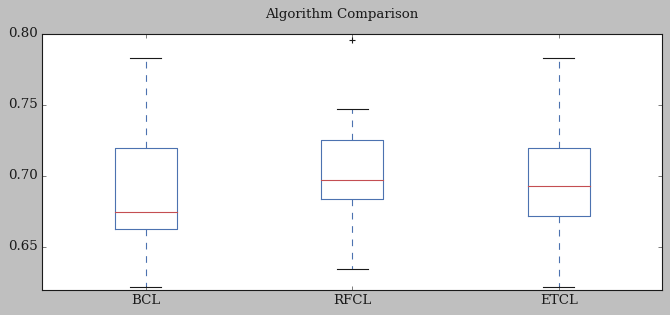

In [ ]:
""" Plotting Comparison """   
plt.style.use('seaborn-deep')
plt.rcParams.update({ "font.family": "serif",})
fig = plt.figure(figsize=(10, 4))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

###### <b>Finally : compare to other ensemble algorithms and SVM (SVC), RandomForestClassifier remains the best test error rate value between 8% and 9%, the best training and prediction accuracy and the confusion matrix with the first seven predictors of the balanced. These are the only variables that impact the woman's contraceptive method that she uses or will use</b>